Consider the function:
$$R(r)=-\frac{1}{16}\sqrt{\frac{5}{3}}r^2e^{-\frac{r}{4}}\left(1-\frac{r}{4}+\frac{r^2}{80}\right)$$ 
Although you don't need to know this for this problem, this is the 4p radial wavefunction for a hydrogen atom. The units are "atomic units",u,  with 1u=0.528e-10 m.

1.  Plot the function over a reasonable region.

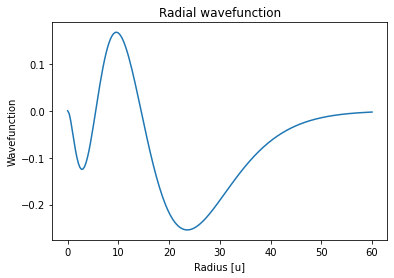

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def R(r):
    ret=-1.0/16*np.sqrt(5.0/3)*r**2*np.exp(-r/4)*(1-r/4+r**2/80)
    return ret

rlist=np.linspace(0,60,200)
plt.plot(rlist,R(rlist))
plt.title("Radial wavefunction")
plt.xlabel('Radius [u]')
plt.ylabel('Wavefunction')
plt.show()

2. Define a function expressing the numerical derivative and plot it.

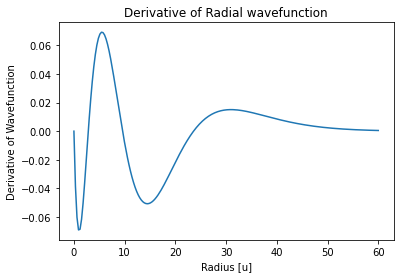

In [10]:
def deriv(r):
    rplus=r+5e-6
    rminus=r-5e-6
    return (R(rplus)-R(rminus))/(rplus-rminus)

plt.plot(rlist,deriv(rlist))
plt.title("Derivative of Radial wavefunction")
plt.xlabel('Radius [u]')
plt.ylabel('Derivative of Wavefunction')
plt.show()

3.  Find the zeros of R(r).  The function doesn't have an actual zero on the right, but use the value of r when R(r)=1e-12.
The first zero is obviously at zero.

In [4]:
from scipy.optimize import root
zeros=np.array([0,root(R,6).x[0], root(R,15).x[0],root(lambda r:R(r)+1e-12,60).x[0]])
print('The zeros of the function are:',zeros)

The zeros of the function are: [  0.           5.52786405  14.47213595 164.02051952]


4.  Interpolate the function with a polynomial.  What is the lowest degree so that we end up with deviations less than 1e-8 of the maximum.

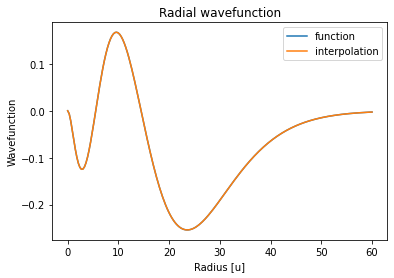

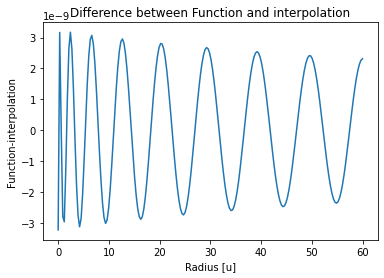

In [9]:
from numpy.polynomial.chebyshev import chebinterpolate,chebval

rlistCheb=rlist/50.0-1.
def RCheb(r):
    return R((1+r)*50)
    
c=chebinterpolate(RCheb,40)

plt.plot(rlist,R(rlist),label='function')
plt.plot(rlist,chebval(rlistCheb,c),label='interpolation')
plt.legend()
plt.title("Radial wavefunction")
plt.xlabel('Radius [u]')
plt.ylabel('Wavefunction')
plt.show()

plt.title("Difference between Function and interpolation")
plt.xlabel('Radius [u]')
plt.ylabel('Function-interpolation')
plt.plot(rlist,R(rlist)-chebval(rlistCheb,c[:30]))

5.  Integrate $\int R^2(r)$ between zeros.  (If you didn't find exact zeros, in (3), make a reasonable estimate based on the plot, and explicitly write them down before integrating)

In [47]:
def integrand(r):
    return R(r)**2
from scipy.integrate import quad

print(f'Integrations:{quad(integrand,0,zeros[1])},{quad(integrand,zeros[1],zeros[2])},{quad(integrand,zeros[2],zeros[3])}')                                  

Integrations:(0.03964333424239885, 4.4012942448822094e-16),(0.12492475612812158, 1.386943405991232e-15),(0.8354319096294794, 1.2909850007649832e-13)
